# Reduction of dimensionality with Principal Component Analysis (PCA)

In [8]:
# Uncomment your path...

save_load_path = '/Users/Dannyhsiao/Dropbox/MA755 Public (1)/pynotes/Danny-Eole-Yuchen/Pickles'
# save_load_path = '/Users/Dannyhsiao/Dropbox/MA755 Public (1)/pynotes/Danny-Eole-Yuchen/Pickles'
# save_load_path = '/Users/YuchenZhou/Dropbox/MA755 Public/pynotes/Danny-Eole-Yuchen/Pickles'

Resource:
1. notebook **PCA - MIKE®**
2. [sebastianraschka.com](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html)

Recap:
1. Take matrix of document term frequency
2. Apply the function of Principle Component
3. Extract Eigen Value
4. Extract Eigen Vector (PCA loading to original variables)
5. Build loading matrix (w_matrix)
6. Attain PC scores for original rows

### Libraries

In [1]:
import pickle
import pandas as pd
import numpy as np
import os
import itertools as it
import matplotlib.pyplot as plt
import math
import h5py 
import os
import itertools
import re
from sklearn.preprocessing import scale
%matplotlib inline

### *[MIKE®]* Function `pcf`: returns series of eign values & eign vectors

In [2]:
def pcf(matrix):
    #scale the data
    A_s = scale(matrix, with_mean=True,with_std=True,axis=0)
    #covariance matrix
    A_c = np.cov(A_s.T)
    #Get the eign values and eign vectors
    eig_val_cov, eig_vec_cov = np.linalg.eig(A_c)
    eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i])
             for i in range(len(eig_val_cov))]
    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs.sort
    eig_pairs.reverse
    return(eig_pairs)

### *[MIKE®]* Function `extract_eign`: returns the eign value out of the eign value / vector pair

In [3]:
def extract_eign(pair):
    eig_val=[0]*len(pair)
    index=0
    for i in pair:
        eig_val[index]=i[0]
        index+=1
    return(eig_val)

### Function `var_explained`: returns amount of variance explained by a number of Principal Components if applied

In [4]:
# Here we want to know how 

def var_explained(eig,i):
    cum_per=0
    per_var=0
    for e_val in (eig[0:i]):
        per_var = round((e_val / len(eig)),3)
        cum_per+=per_var
    return(cum_per)

# PCA: lyrics, Tf weighting

### Load the Tf weighted document-term matrix

In [9]:
dtm_tf_matrix = np.load(save_load_path+'/lyrics_english_tf_matrix.npy')

print ("document term matrix:")
print ()
print (dtm_tf_matrix)
print ()
print ("shape:{shape}".format(shape = dtm_tf_matrix.shape))


document term matrix:

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]

shape:(1980, 3394)


In [10]:
# Normalization brefore PCA

import numpy as np
import sklearn
from sklearn.preprocessing import normalize

dtm_tf_matrix=sklearn.preprocessing.normalize(dtm_tf_matrix,norm='l2',axis=1)


### Get series of eign values & eign vectors for the document term matrix

In [11]:
pc_tf = pcf(dtm_tf_matrix)   # Each PC is a list of two items: 
                             #   1. the 'Eigen Value' 
                             #   2. an array of the 'Eigen vector' (loadings to each variable)

### PC1: principal component with highest eigen value and the its eigen vector

In [12]:
print(pc_tf[0])

(26.641855697873183, array([ -1.42780944e-04+0.j,  -4.04999879e-04+0.j,  -4.36252284e-04+0.j,
       ...,   1.91927021e-01+0.j,  -1.98793746e-04+0.j,
        -3.13516527e-04+0.j]))


Now we have all the eign values of PCs. We decide on the number of principal components

In [13]:
pceign_tf=extract_eign(pc_tf)

We plot the eign values of all PCs. As a rule of thumb, we drop PCs if its eign value lower than 1.

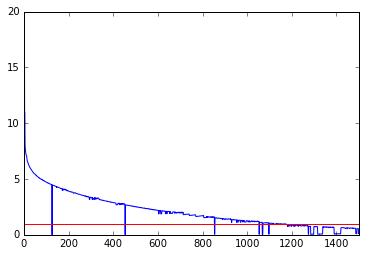

In [14]:
plt.plot(pceign_tf)
plt.axis([0,1500,0,20])
plt.axhline(y=1,color='r')

** *Choose number of PCs based on graph* !! **

In [32]:
num_pc_tf = 718

In [33]:
var_explained(pceign_tf,num_pc_tf)

0.8000000000000006

Hence 690 first principal components provide 81.4% of the information

# PC scores

1. Extract Eigen vector for the principal component created
2. Form the loading matrix: `w_matrix`, of shape (`num_terms`, `num_pc`)
3. dot(`w_matrix`, `dtm_matrix`) = `pc_scores`, of shape (`num_tracks`, `num_terms`)

In [34]:
# Eigen vector len = number of track_IDs
len_vector = dtm_tf_matrix.shape[1]

# Initialize
w_matrix_tf = np.empty([len_vector,1], dtype = float)

# Fill by stacking eigen vectors vertically
for i in range(num_pc_tf):
    pc_col = pc_tf[i][1].reshape(len_vector,1)
    w_matrix_tf = np.hstack((w_matrix_tf, pc_col))

# Delete initialized empty column on left hand side
w_matrix_tf = np.delete(w_matrix_tf,0,1).astype(float)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: ComplexWarning: Casting complex values to real discards the imaginary part


In [35]:
# w_matrix: rows (original variables in 4734)
#           columns (selected PCs in 718)

print(w_matrix_tf.shape)
print('****************************************************')
print(w_matrix_tf)

(3394, 718)
****************************************************
[[ -1.42780944e-04  -2.13319795e-04  -2.67488077e-03 ...,   3.84638455e-03
    1.37017498e-03  -1.31632588e-02]
 [ -4.04999879e-04   2.36106337e-04  -2.96656149e-04 ...,   3.84975751e-03
   -5.09125910e-03   3.16083225e-02]
 [ -4.36252284e-04   1.18701013e-03   6.22595515e-03 ...,   1.31702537e-02
   -1.69730117e-02   2.11667659e-02]
 ..., 
 [  1.91927021e-01   2.04257704e-02   6.25305700e-03 ...,   1.77077284e-04
    8.52744518e-04  -1.16528116e-03]
 [ -1.98793746e-04  -1.11011983e-04  -3.68501650e-03 ...,  -9.59332682e-04
    1.47089330e-02   6.46344059e-03]
 [ -3.13516527e-04   3.94995979e-04   9.73179339e-04 ...,   3.74386970e-03
    8.41920329e-03   5.76438205e-03]]


In [36]:
# Finally, reset each rows (each song) according to the loading of PCs. 
# It is the PC score of each row to each PC. 

pc_scores_tf = dtm_tf_matrix.dot(w_matrix_tf)
pc_scores_tf.shape

(1980, 718)

In [37]:
pc_scores_tf

array([[-0.01030365,  0.01059474, -0.00068338, ...,  0.00161905,
        -0.02257283,  0.01957717],
       [-0.00725037,  0.00898708,  0.01230242, ..., -0.01005918,
         0.04513773, -0.08340719],
       [-0.00483139,  0.00953444,  0.01212349, ...,  0.03210735,
         0.0263663 , -0.06916394],
       ..., 
       [-0.00560974,  0.00589982, -0.00691469, ..., -0.00679076,
        -0.02045667,  0.00376945],
       [-0.01075716,  0.01459577,  0.04247685, ...,  0.00289947,
         0.01759068,  0.0077596 ],
       [-0.00854585,  0.01126258,  0.02148592, ...,  0.0391399 ,
        -0.01896568,  0.00717584]])

In [39]:
# Checkpoint - pickle pickle pickle!
np.save(save_load_path+'/pc_scores_tf', pc_scores_tf)